In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:87% !important; }</style>"))

In [3]:
%matplotlib inline

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker
import pandas as pd
import sys
import matplotlib as mpl
from matplotlib import rc
from matplotlib.lines import Line2D
from scipy.optimize import curve_fit
mpl.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams.update({'font.size': 18})

In [5]:
### plot the hydrolysis spectrum of 1AI/imidazole and fit to single exponential decay.

In [6]:
s1ai = pd.read_csv('/gpfs/commons/groups/innovation/will/shapemap2/6-27-19_1ai-hydrolysis/6-27-19_1ai_combined.csv', engine='python')
sim = pd.read_csv('/gpfs/commons/groups/innovation/will/shapemap2/6-27-19_1ai-hydrolysis/6-27-19_im_combined.csv', engine='python')

In [7]:
wl_x = 250
time = np.arange(0,42,2)

a_wl = s1ai.loc[s1ai['wavelength'] == wl_x]
a_wl = (a_wl.drop('wavelength', 1)).values.tolist()
a_wl = a_wl[0]

im_wl = sim.loc[sim['wavelength'] == wl_x]
im_wl = (im_wl.drop('wavelength', 1)).values.tolist()
im_wl = im_wl[0]

In [9]:
def exp_func(x, a, b, c):
    return a*np.exp(-b*x)+c

popt, pcov = curve_fit(exp_func, time, a_wl)

xx = np.linspace(0, max(time), 500)
yy = exp_func(xx, popt[0], popt[1], popt[2])
#yy = func(xx, popt[0], popt[1], popt[2])


zz = np.polyfit(time, im_wl, 1)
p = np.poly1d(zz)

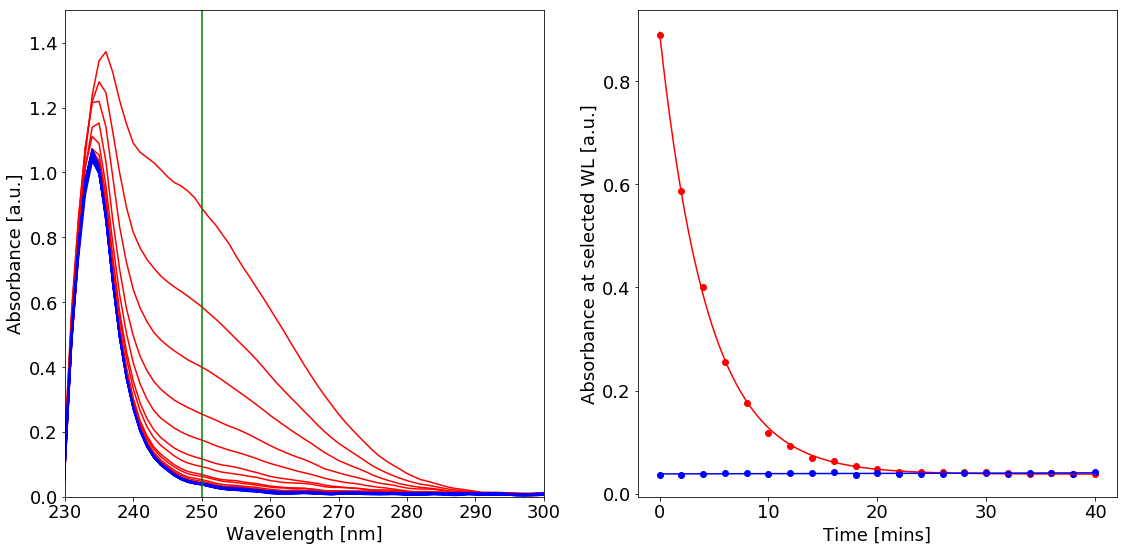

In [10]:

fig1, axs = plt.subplots(1,2, figsize=(16,8))
for i in s1ai.columns:
    if i != 'wavelength':
        axs[0].plot(s1ai['wavelength'], s1ai[i], 'r')
for i in sim.columns:
    if i != 'wavelength':
        axs[0].plot(sim['wavelength'], sim[i], 'b')

axs[0].axvline(wl_x, color = 'g')       
        
axs[0].set_xlim(230, 300)
axs[0].set_ylim(0, 1.5)
axs[0].set_ylabel('Absorbance [a.u.]')
axs[0].set_xlabel('Wavelength [nm]')

axs[1].plot(time, a_wl, 'ro')
axs[1].plot(time, im_wl, 'bo')
axs[1].plot(xx, yy, 'r-')
axs[1].plot(xx, p(xx), 'b-')
axs[1].set_ylabel('Absorbance at selected WL [a.u.]')
axs[1].set_xlabel('Time [mins]')

fig1.tight_layout()

In [11]:
### half-life calculation
#half-life is ln(2)/lambda (lambda = b in func -> a*exp(-b*x)+c)
t_half = np.log(2) / popt[1]
print('The half-life of 1AI at', wl_x, 'nm is:', np.round(t_half,2), 'minutes')

The half-life of 1AI at 250 nm is: 3.07 minutes


In [12]:
fig1.savefig('plots/1ai_hyd.pdf')